In [12]:
# Fuzzy C Means

def FCM(data,K,itr,eps):
  U=np.random.rand(len(data),K)
  U=U/np.sum(U,axis=1,keepdims=True)
  J=[]
  for n in range(itr):

    r=1.05
    m=[]
    for i in range(data.shape[1]):
      m.append(np.sum((U**r)*data[:,i].reshape(len(data),1),axis=0,keepdims=True)/np.sum((U**r),axis=0,keepdims=True))
    center=np.concatenate(m,axis=0).T

    cluster_label=np.argmax(U,axis=1) #Label Points
    # plt.figure()
    # for l in range(K):
    #   id=np.where(cluster_label==l)
    #   plt.plot(data[id,0],data[id,1],'.',color=clr[l],marker=mrk[l])
    # Cents=center
    # plt.plot(Cents[:,0],Cents[:,1],'X',color='k')
    # plt.title('Iteration= %d' % (i))

    D=[]
    for c in center:
      d=np.linalg.norm(data-c,axis=1,keepdims=True)
      if len(D)==0:
        D=d
      else:
        D=np.concatenate((D,d),axis=1)
    J.append(np.sum(U**r * D))

    U=np.zeros(U.shape)
    for i in range(K):
      U+=((D**2)/(D**2)[:,i].reshape(len(data),1))**(1/(r-1))
    U=1/U
    print(n,end = '-->')
  # plt.figure()
  # plt.plot(J)
  return U,center,J

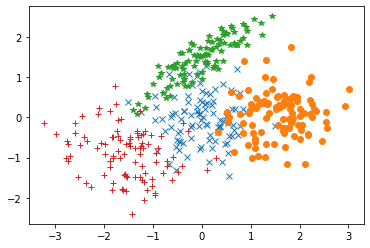

In [13]:
import numpy as np
import matplotlib.pyplot as plt

## Data generation
# write your code here
mean=np.array([0,0])
cov=0.3*np.array([[1,0],[0,1]])
x4=np.random.multivariate_normal(mean, cov, 100)
plt.plot(x4[:,0],x4[:,1],"x")

mean=np.array([1.5,0])
cov=0.3*np.array([[1,0],[0,1]])
x2=np.random.multivariate_normal(mean, cov, 100)
plt.plot(x2[:,0],x2[:,1],"o")

mean=np.array([0,1.5])
cov=np.array([[0.3,0.25],[0.25,0.3]])
x3=np.random.multivariate_normal(mean, cov, 100)
plt.plot(x3[:,0],x3[:,1],"*")

mean=np.array([-1.5,-1])
cov=0.4*np.array([[1,0],[0,1]])
x1=np.random.multivariate_normal(mean, cov, 100)
plt.plot(x1[:,0],x1[:,1],"+")

plt.show()

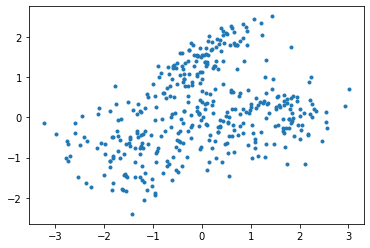

In [14]:
x=np.concatenate((x1,x2,x3,x4), axis=0)
plt.plot(x[:,0],x[:,1],".")

0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->(400, 4)


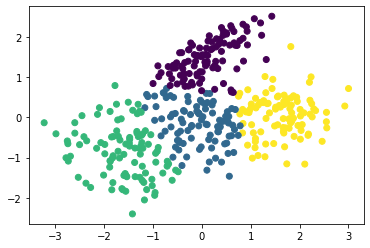

In [16]:
U,cents,error=FCM(x,4,20,10**(-20))
print(U.shape)
cluster_label=np.argmax(U,axis=1) #Label Points
plt.scatter(x[:,0], x[:,1],c=cluster_label)
plt.show()